Imports

In [1]:
#Imports
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

Carregar o dataset

In [2]:
#Carregar o dataset
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploracao dos dados

In [3]:
#explorar os dados
'''imagens_treino.shape
len(identificacoes_treino)
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.max()
identificacoes_treino.min()'''

'imagens_treino.shape\nlen(identificacoes_treino)\nimagens_teste.shape\nlen(identificacoes_teste)\nidentificacoes_treino.max()\nidentificacoes_treino.min()'

Exibição dos dados

Text(0.5, 1.0, 'Bota')

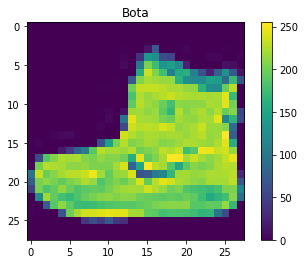

In [4]:
#exibir os dados
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
'''plt.title(identificacoes_treino[0])
print(nomes_de_classificacoes[9])
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[imagem])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.title(nomes_de_classificacoes[9])

In [11]:
imagens_treino = imagens_treino/255.0 #normalização de 0-255 para 0-1

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),        #trasnforma de 28x28 em 1x784
    keras.layers.Dense(256, activation = tf.nn.relu),    #conecta os layes Unidade Linear Retificada
    #keras.layers.Dense(128, activation = tf.nn.relu),
    #keras.layers.Dense(64, activation = tf.nn.relu),    #increases the losses
    keras.layers.Dense(10, activation = tf.nn.softmax)   #defini as problabilidades das camadas anteriores e escolhe
])
  
modelo.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0428 - accuracy: 0.6711 - val_loss: 0.6754 - val_accuracy: 0.7554
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6210 - accuracy: 0.7760 - val_loss: 0.5750 - val_accuracy: 0.7899
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5485 - accuracy: 0.8047 - val_loss: 0.5263 - val_accuracy: 0.8133
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5080 - accuracy: 0.8207 - val_loss: 0.4984 - val_accuracy: 0.8245
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4814 - accuracy: 0.8300 - val_loss: 0.4774 - val_accuracy: 0.8298


AttributeError: ignored

In [22]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acuracia por epocas')
plt.xlabel('Epochs')
plt.ylabel('Acuracia')

KeyError: ignored

In [6]:
testes = modelo.predict(imagens_teste)
print('Resultado teste: ', np.argmax(testes[1]))
print('Numero da imagem de teste: ',identificacoes_teste[1])

Resultado teste:  2
Numero da imagem de teste:  2


In [7]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda teste: ', perda_teste)
print('Acurarica teste; ', acuracia_teste*100)

313/313 [==============================] - 0s 1ms/step - loss: 48.4696 - accuracy: 0.8746
Perda teste:  48.469600677490234
Acurarica teste;  87.45999932289124
